In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_csv = "data/city_data.csv"
ride_csv = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_csv)
ride_data = pd.read_csv(ride_csv)


# Combine the data into a single dataset
df = pd.merge(ride_data, city_data, on="city", how = "left")
# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

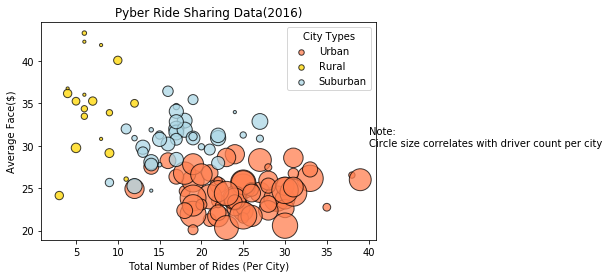

In [18]:
# Obtain the x and y coordinates for each of the three city types: (Urban, Rural & Suburban)
urban_type = df[df["type"] == "Urban"].groupby([df["city"]])
rural_type = df[df["type"] == "Rural"].groupby([df["city"]])
suburban_type = df[df["type"] == "Suburban"].groupby([df["city"]])

x_urban = urban_type["ride_id"].count()
y_urban = urban_type["fare"].mean()
s_urban = urban_type["driver_count"].mean()

x_rural = rural_type["ride_id"].count()
y_rural = rural_type["fare"].mean()
s_rural = rural_type["driver_count"].mean()

x_suburban = suburban_type["ride_id"].count()
y_suburban = suburban_type["fare"].mean()
s_suburban = suburban_type["driver_count"].mean()


# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban * 10, color=["lightblue"], edgecolor="black", alpha = 0.75, marker="o")


# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Face($)")
plt.title("Pyber Ride Sharing Data(2016)")

# Create a legend
legend = plt.legend(fontsize = 10, title= "City Types", loc="best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]


# Incorporate a text label regarding circle size
plt.text(40,30,"Note: \nCircle size correlates with driver count per city")


# Save Figure
plt.savefig("Images/RideSharingData.png", bbox_inches="tight")


In [13]:
# Show plot
plt.show()

## Total Fares by City Type

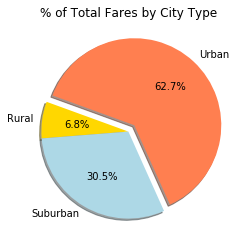

In [36]:
# Calculate Type Percents
type_groupped = df.groupby(['type'])
fare_sum = type_groupped['fare'].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightblue", "coral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Images/TotalFaresByCity.png")

In [20]:
# Show Figure
plt.show()

## Total Rides by City Type

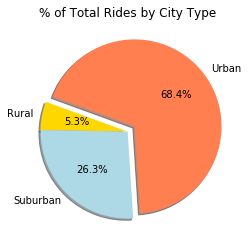

In [35]:
# Calculate Ride Percents
ride_count = type_groupped['ride_id'].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightblue", "coral"]

plt.pie(ride_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Images/TotalRidesByCity.png")

In [28]:
# Show Figure
plt.show()

## Total Drivers by City Type

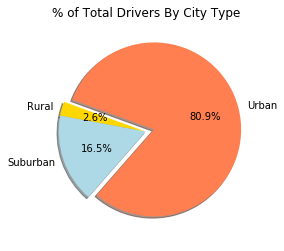

In [34]:
# Calculate Driver Percents
type_groupped_drivers = city_data.groupby(['type'])
drivers_sum = type_groupped_drivers['driver_count'].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold","lightblue","coral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers By City Type")
# Save Figure
plt.savefig("Images/TotalDriversByCity.png")

In [33]:
# Show Figure
plt.show()